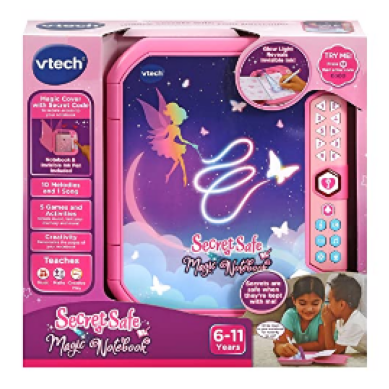

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

img = cv2.imread('data/img0.jpg')
img = cv2.resize(img,(256,256))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(img)

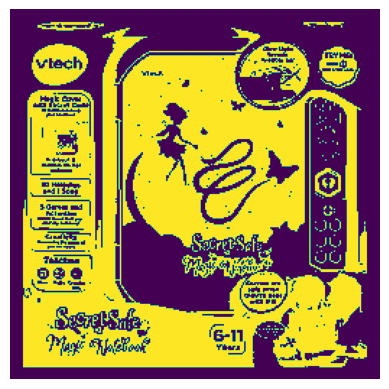

In [3]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.imshow(thresh)

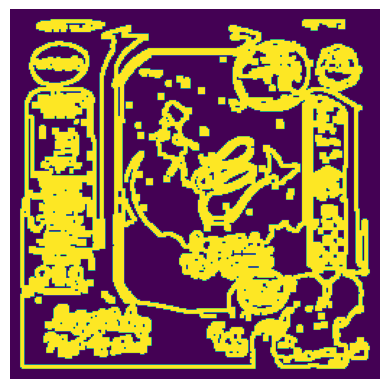

In [4]:
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

plt.axis('off')
plt.imshow(edges)

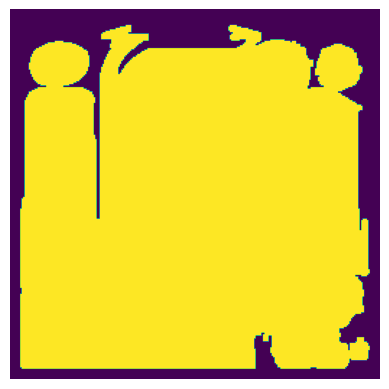

In [5]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

plt.axis('off')
plt.imshow(masked)

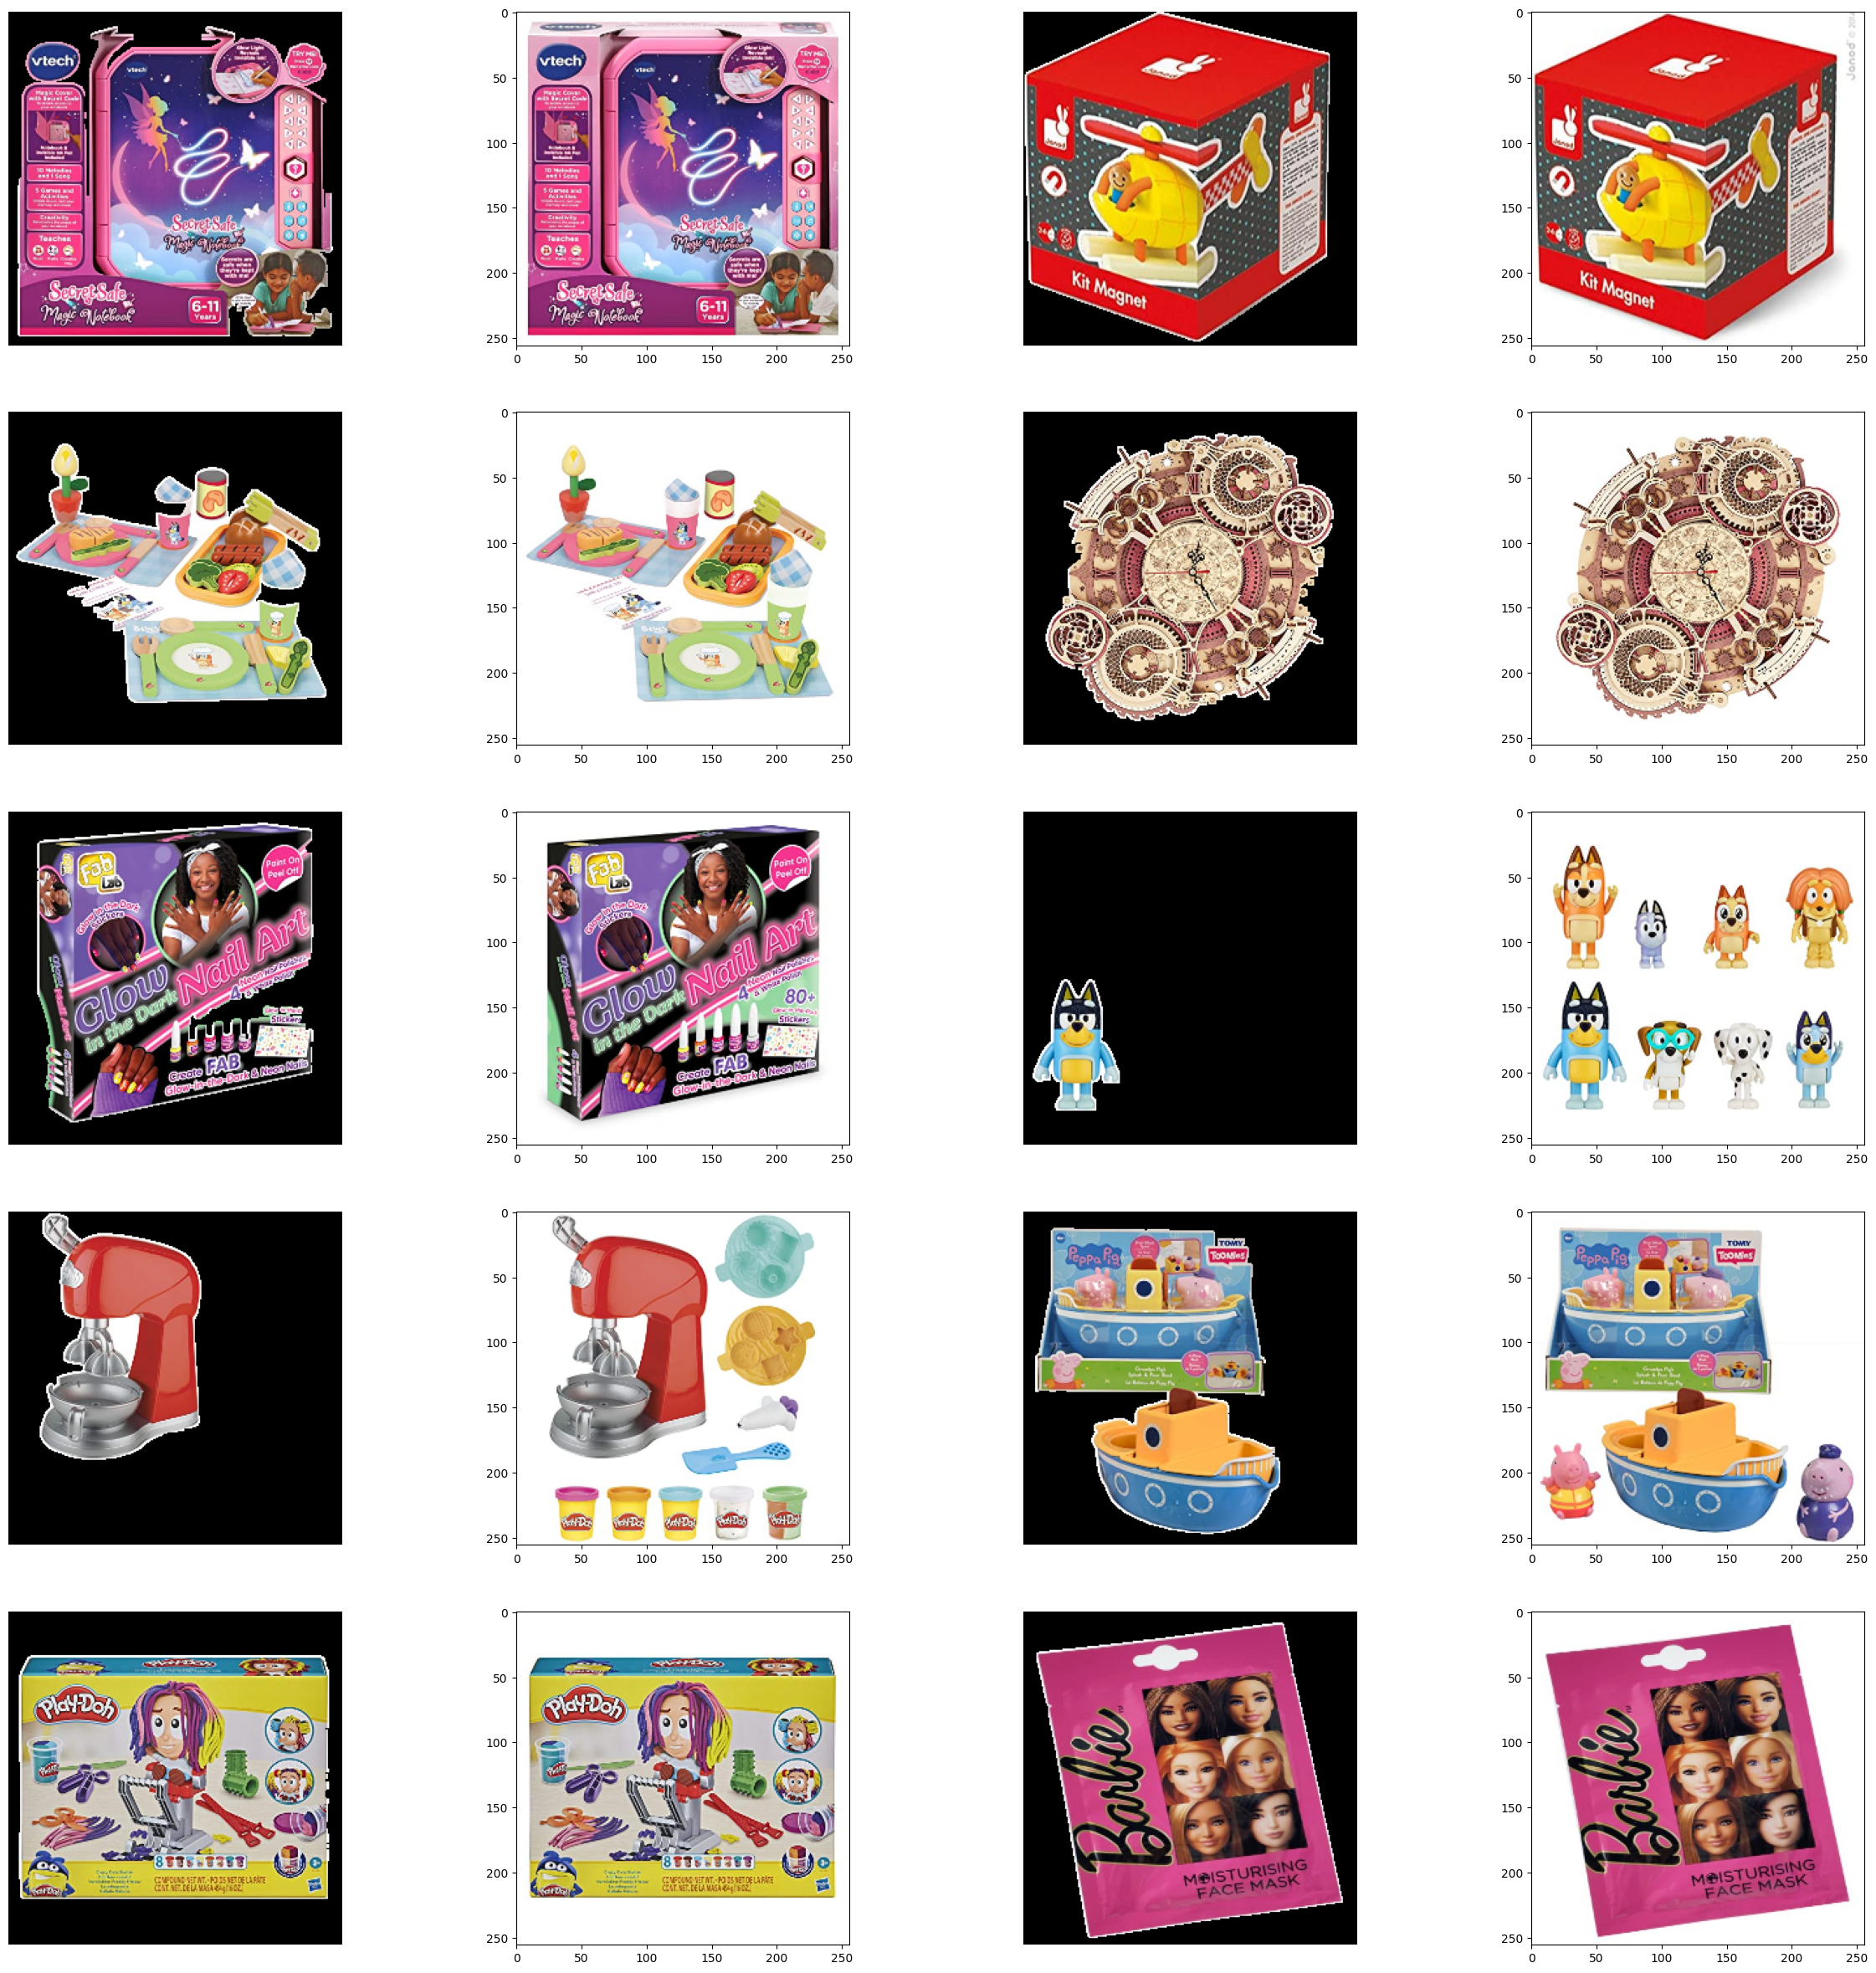

In [1]:
import inspect
import sys
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.insert(0, os.path.dirname(currentdir))


directory = 'data'

f, axarr = plt.subplots(5,4,figsize=(30, 30)) 

for i,img_path in enumerate(os.listdir(directory)):
    try:

        img = cv2.imread(f'{directory}/{img_path}')
        img = cv2.resize(img,(256,256))

        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        _,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
        edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

        cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
        mask = np.zeros((256,256), np.uint8)
        masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

        dst = cv2.bitwise_and(img, img, mask=mask)
        segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        x,y = i//2,i%2
        y = y+1 if y == 1 else y
        axarr[x,y].imshow(segmented)
        axarr[x,y].axis('off')

        axarr[x,y+1].imshow(img)
        axarr[x,y].axis('off')

    except Exception as e:
        print(e)